# selenium-显示等待，获取动态网页数据-爬取当当数据

In [91]:
#【练习】爬取当当畅销书本   （前10页 或 全部爬取）

#    和人邮存在的不同之处：人邮是异步加载，在右键-网页源码中查不到书本信息，但清华和当当的都是在源码中能查到，
#    验证：书籍信息是同步加载，不用sleep强制等待，但翻页按钮是异步加载的， 必须让滚动条滚到页面底部，翻页按钮出现，否则会出错
#    翻页时，如果只爬取前10页，则不必判断下一页按钮是否失效
#    如果是全部爬完，则需要注意，这一题翻页按钮a的上级按钮为 < li class='next'，但是到最后一页变为 <li class='next none'
#    所以，对a的定位不能用li，只能用a本身，而a本身没有特殊特征，可以用其含有文本“下一页”来做判断
  
#    本题未加sleep，可以正常爬取数据


import pandas as pd

from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from lxml import etree
import time

driver = webdriver.Chrome()       # 打开chrome浏览器
url='http://book.dangdang.com/'
driver.get(url) #访问 当当 主页

driver.maximize_window()#当前窗口最大化

# 下拉屏幕至1000像素
# driver.execute_script('scrollTo(0,1000)')

changxiao= driver.find_element(By.XPATH,'//*[@id="bd_auto"]/div[3]/div[3]/div[1]/div[2]/a')
changxiao.click()    # 点击畅销图书

driver.switch_to.window(driver.window_handles[-1]  )

jinqiri=driver.find_element(By.XPATH,'/html/body/div[3]/div[3]/div[2]/div[1]/p[1]/span[2]/a[2]')
jinqiri.click()    # 点击近7日畅销

# 爬取所有书本信息
wait = WebDriverWait(driver, 10)    # 设置等待时长

df=pd.DataFrame(columns=['书名','作者','出版日期','出版社','现价','原价','评论数']) # 空数据框

while True:
#for page in range(10):
    name = wait.until( EC.presence_of_all_elements_located( (By.XPATH, '/html/body/div[3]/div[3]/div[2]/ul/li/div[3]/a')))
    names=[i.text  for i in name]

    author = wait.until( EC.presence_of_all_elements_located( (By.XPATH, '/html/body/div[3]/div[3]/div[2]/ul/li/div[5]/a[1]')))
    authors=[i.text  for i in author]

    date = wait.until( EC.presence_of_all_elements_located( (By.XPATH, '/html/body/div[3]/div[3]/div[2]/ul/li/div[6]/span')))
    dates=[i.text  for i in date]

    publisher= wait.until( EC.presence_of_all_elements_located( (By.XPATH, '/html/body/div[3]/div[3]/div[2]/ul/li/div[6]/a')))
    publishers=[ i.text  for i in publisher]


    price1= wait.until( EC.presence_of_all_elements_located( (By.XPATH, '/html/body/div[3]/div[3]/div[2]/ul/li/div[7]/p[1]/span[1]')))
    price_n=[i.text  for i in price1]


    price2= wait.until( EC.presence_of_all_elements_located( (By.XPATH, '/html/body/div[3]/div[3]/div[2]/ul/li/div[7]/p[1]/span[2]')))
    price_r=[i.text  for i in price2]

    comm=wait.until( EC.presence_of_all_elements_located( (By.XPATH, '/html/body/div[3]/div[3]/div[2]/ul/li/div[4]/a')))
    comms=[int(i.text.strip("条评论"))  for i in comm]
    # comms=int(comms)

    df1=pd.DataFrame({'书名':names,'作者':authors,'出版日期':dates,'出版社':publishers,'现价':price_n,'原价':price_r,'评论数':comms})

    df=pd.concat([df,df1],ignore_index=True)
   
   # driver.execute_script("window.scrollTo(0,2500);") # 直接指定滚动的像素，滚动到页面底端（此句可行，最好用以下两句）
    
    js = 'window.scrollTo(0,document.body.scrollHeight)'   #窗口滚动到底部
    driver.execute_script(js)
    # 滚动到顶部       js = 'window.scrollTo(0,document.body.scrollTop=0)'

    
    next_btn=wait.until(EC.element_to_be_clickable((By.XPATH, '//a[contains(text(),"下一页")]' )))
    
#     /html/body/div[3]/div[3]/div[2]/div[3]/ul/li[8]/a
    if next_btn.get_attribute('href')=="javascript:void(0);"  :     # 下一页按钮失效则跳出循环
        break
    next_btn.click()

    
# df.to_excel("d:/aa/temp/2023当当畅销书.xlsx",encoding='gbk',index=None)
df



,书名,作者,出版日期,出版社,现价,原价,评论数
0,我与地坛（纪念版）,史铁生,2011-06-01,人民文学出版社,¥29.00,¥29.00,440284
1,你也走了很远的路吧（新增2万余字，4篇文章，关于特殊时期成长的...,卢思浩,2022-09-26,湖南文艺出版社,¥46.30,¥49.80,312277
2,法治的细节（罗翔新作，法律随笔，评热点、论法理、聊读书、谈爱...,罗翔,2021-11-01,云南人民出版社,¥44.80,¥49.80,294534
3,真希望你也喜欢自己（房琪shou部作品重磅上市！写给所有年轻人的...,房琪kiki,2022-09-28,北京联合出版有限公司,¥37.30,¥49.80,428076
4,带壳的牡蛎是大人的心脏（当当专享签章版+作者亲绘贴纸。火爆全网...,拟泥nini,2022-09-01,北京联合出版有限公司,¥40.80,¥68.00,159450
...,...,...,...,...,...,...,...
495,阿Q正传（收录鲁迅《阿Q正传》《狂人日记》《药》等17个中短篇小...,鲁迅,2014-12-01,北京联合出版公司,¥17.00,¥20.00,230931
496,你为什么不开花（中信童书世界精选绘本）,卡塔琳娜·玛卡诺娃,2018-04-01,中信出版社,¥22.10,¥38.00,24157
497,陪孩子看中国画,田玉彬,2022-06-01,中国少年儿童出版社,¥96.00,¥98.00,235
498,调皮的日子新版（套装3册）,秦文君,2020-01-01,春风文艺出版社,¥81.00,¥81.00,61353


In [2]:
import numpy as np
import pandas as pd
df=pd.read_excel("d:/aa/temp/2023当当畅销.xlsx") #读出数据

In [3]:
# 1.去掉价格前面的人民币符号
def fun1(x):
    s = str(x)
    return s[1:]
df['现价（数值）'] = df.现价.apply(fun1).astype('float')



# 2.根据评论数，增加推荐指数列，30000以下为1星，3w-10w,10w-20w,20w-50w,50w-最大值

maxc=max(df['评论数'])
minc=min(df['评论数'])
def fun2(x):
    n = int(x)
    if n<30000:
        return '☆'
    elif n < 100000:
        return '☆☆'
    elif n < 200000:
        return '☆☆☆'
    elif n < 500000:
        return '☆☆☆☆'
    else:
        return '☆☆☆☆☆'
df['推荐指数'] = df.评论数.apply(fun2)
df.head()

,书名,作者,出版日期,出版社,现价,原价,评论数,现价（数值）,推荐指数
0,你也走了很远的路吧（新增2万余字，4篇文章，关于特殊时期成长的...,卢思浩,2022-09-26,湖南文艺出版社,¥24.90,¥49.80,292868,24.9,☆☆☆☆
1,我与地坛（纪念版）,史铁生,2011-06-01,人民文学出版社,¥19.40,¥29.00,424410,19.4,☆☆☆☆
2,法治的细节（罗翔新作，法律随笔，评热点、论法理、聊读书、谈爱...,罗翔,2021-11-01,云南人民出版社,¥24.90,¥49.80,284113,24.9,☆☆☆☆
3,真希望你也喜欢自己（房琪shou部作品重磅上市！写给所有年轻人的...,房琪kiki,2022-09-28,北京联合出版有限公司,¥37.30,¥49.80,419277,37.3,☆☆☆☆
4,带壳的牡蛎是大人的心脏（当当专享签章版+作者亲绘贴纸。火爆全网...,拟泥nini,2022-09-01,北京联合出版有限公司,¥40.80,¥68.00,136824,40.8,☆☆☆


In [2]:
import numpy as np
import pandas as pd
df=pd.read_excel("d:/aa/temp/2023当当畅销.xlsx") #读出数据

In [3]:
# 1.去掉价格前面的人民币符号
def fun1(x):
    s = str(x)
    return s[1:-1]
df['现价（数值）'] = df.现价.apply(fun1)


In [4]:
# 2.根据评论数，增加推荐指数列，30000以下为1星，3w-10w,10w-20w,20w-50w,50w-最大值
def fun2(x):
    n = int(x)
    if n<30000:
        return '☆'
    elif n < 100000:
        return '☆☆'
    elif n < 200000:
        return '☆☆☆'
    elif n < 500000:
        return '☆☆☆☆'
    else:
        return '☆☆☆☆☆'
df['推荐指数'] = df.评论数.apply(fun2)
# maxc=max(df['评论数'])
# minc=min(df['评论数'])

In [5]:
df.head()

,书名,作者,出版日期,出版社,现价,原价,评论数,现价（数值）,推荐指数
0,你也走了很远的路吧（新增2万余字，4篇文章，关于特殊时期成长的...,卢思浩,2022-09-26,湖南文艺出版社,¥24.90,¥49.80,292868,24.9,☆☆☆☆
1,我与地坛（纪念版）,史铁生,2011-06-01,人民文学出版社,¥19.40,¥29.00,424410,19.4,☆☆☆☆
2,法治的细节（罗翔新作，法律随笔，评热点、论法理、聊读书、谈爱...,罗翔,2021-11-01,云南人民出版社,¥24.90,¥49.80,284113,24.9,☆☆☆☆
3,真希望你也喜欢自己（房琪shou部作品重磅上市！写给所有年轻人的...,房琪kiki,2022-09-28,北京联合出版有限公司,¥37.30,¥49.80,419277,37.3,☆☆☆☆
4,带壳的牡蛎是大人的心脏（当当专享签章版+作者亲绘贴纸。火爆全网...,拟泥nini,2022-09-01,北京联合出版有限公司,¥40.80,¥68.00,136824,40.8,☆☆☆


In [6]:
df.dtypes

书名        object
作者        object
出版日期      object
出版社       object
现价        object
原价        object
评论数        int64
现价（数值）    object
推荐指数      object
dtype: object

In [7]:
# 【综合】读入文件“d:/aa/temp/2023当当畅销.xlsx”
# 1. 找出最热门的 top 20 本书
# 2. 制作书名和评论数的条形图，判断标准，评论数越多越热门


import numpy as np
import pandas as pd
df1=pd.read_excel("d:/aa/temp/2023当当畅销.xlsx") #读出数据

# 判断标准，评论数越多越热门
# 1.去掉价格前面的人民币符号
df1['现价（数值）'] = df1.现价.apply(fun1)
df1['推荐指数'] = df1.评论数.apply(fun2)
df1.评论数 = df1.评论数.astype('int64')
df1.sort_values(by="评论数" , inplace=True, ascending=True) 

,书名,作者,出版日期,出版社,现价,原价,评论数,现价（数值）,推荐指数
295,少年中国地理6：秘境西部（“这里是中国”系列作者星球研究所重磅...,星球研究所,2023-01-04,湖南科技出版社,¥67.60,¥98.00,29,67.6,☆
294,少年中国地理4：北方大地（“这里是中国”系列作者星球研究所重磅...,星球研究所,2023-01-04,湖南科技出版社,¥67.60,¥98.00,29,67.6,☆
288,少年中国地理7：大国工程（“这里是中国”系列作者星球研究所重磅...,星球研究所,2023-01-03,湖南科技出版社,¥70.30,¥102.00,33,70.3,☆
290,少年中国地理5：秀丽南方（“这里是中国”系列作者星球研究所重磅...,星球研究所,2023-01-04,湖南科技出版社,¥67.60,¥98.00,34,67.6,☆
286,少年中国地理3：壮美生灵（“这里是中国”系列作者星球研究所重磅...,星球研究所,2023-01-04,湖南科技出版社,¥67.60,¥98.00,34,67.6,☆
...,...,...,...,...,...,...,...,...,...
65,东野圭吾：白夜行（易烊千玺、孟非推荐，东野圭吾作品无冕之王）,东野圭吾,2017-08-09,南海出版公司,¥29.80,¥59.60,2049409,29.8,☆☆☆☆☆
12,三体：全三册 刘慈欣代表作，亚洲“雨果奖”获奖作品！,刘慈欣,2010-11-01,重庆出版社,¥51.20,¥93.00,2112978,51.2,☆☆☆☆☆
328,人间失格（日本小说家太宰治代表作，一个对村上春树影响至深的绝...,太宰治,2015-08-01,作家出版社,¥10.00,¥25.00,2215634,10.0,☆☆☆☆☆
78,马尔克斯：百年孤独（50周年纪念版）,加西亚·马尔克斯,2017-08-01,南海出版公司,¥39.60,¥55.00,2232319,39.6,☆☆☆☆☆


In [7]:
# 【综合】读入文件“d:/aa/temp/2023当当畅销.xlsx”
# 1. 找出最热门的 top 20 本书
# 2. 制作书名和评论数的条形图，判断标准，评论数越多越热门


import numpy as np
import pandas as pd
df1=pd.read_excel("d:/aa/temp/2023当当畅销.xlsx") #读出数据
# 判断标准，评论数越多越热门
df1['现价（数值）'] = df1.现价.apply(fun1)
df1['推荐指数'] = df1.评论数.apply(fun2)

In [8]:
df1.评论数 = df1.评论数.astype('int64')

In [9]:
df1.dtypes

书名        object
作者        object
出版日期      object
出版社       object
现价        object
原价        object
评论数        int64
现价（数值）    object
推荐指数      object
dtype: object

In [10]:
df1.sort_values(by="评论数" , inplace=True, ascending=True) 

In [11]:
df1

,书名,作者,出版日期,出版社,现价,原价,评论数,现价（数值）,推荐指数
295,少年中国地理6：秘境西部（“这里是中国”系列作者星球研究所重磅...,星球研究所,2023-01-04,湖南科技出版社,¥67.60,¥98.00,29,67.6,☆
294,少年中国地理4：北方大地（“这里是中国”系列作者星球研究所重磅...,星球研究所,2023-01-04,湖南科技出版社,¥67.60,¥98.00,29,67.6,☆
288,少年中国地理7：大国工程（“这里是中国”系列作者星球研究所重磅...,星球研究所,2023-01-03,湖南科技出版社,¥70.30,¥102.00,33,70.3,☆
290,少年中国地理5：秀丽南方（“这里是中国”系列作者星球研究所重磅...,星球研究所,2023-01-04,湖南科技出版社,¥67.60,¥98.00,34,67.6,☆
286,少年中国地理3：壮美生灵（“这里是中国”系列作者星球研究所重磅...,星球研究所,2023-01-04,湖南科技出版社,¥67.60,¥98.00,34,67.6,☆
...,...,...,...,...,...,...,...,...,...
65,东野圭吾：白夜行（易烊千玺、孟非推荐，东野圭吾作品无冕之王）,东野圭吾,2017-08-09,南海出版公司,¥29.80,¥59.60,2049409,29.8,☆☆☆☆☆
12,三体：全三册 刘慈欣代表作，亚洲“雨果奖”获奖作品！,刘慈欣,2010-11-01,重庆出版社,¥51.20,¥93.00,2112978,51.2,☆☆☆☆☆
328,人间失格（日本小说家太宰治代表作，一个对村上春树影响至深的绝...,太宰治,2015-08-01,作家出版社,¥10.00,¥25.00,2215634,10.0,☆☆☆☆☆
78,马尔克斯：百年孤独（50周年纪念版）,加西亚·马尔克斯,2017-08-01,南海出版公司,¥39.60,¥55.00,2232319,39.6,☆☆☆☆☆


In [12]:
df2 = df1[['书名','评论数']]
df2[-20:]

,书名,评论数
143,夏洛的网(2020版）（三年级阅读经典书目）,1223042
496,围城 钱锺书著（2022年精装新版）,1231065
103,少年读史记（套装全5册）,1293201
125,皮囊（400万册纪念版，直面人生的难题，刻在骨头里的故事，容纳一...,1319902
107,神奇校车·桥梁书版（全20册）,1456682
16,作家榜名著：月亮与六便士（全新未删节插图珍藏版！毛姆写给年轻...,1460263
7,蛤蟆先生去看心理医生（热销300万册！英国经典心理咨询入门书，知...,1461776
37,云边有个小卖部（俞敏洪《在岁月中远行》单独撰文推荐，随书附赠...,1483629
23,你当像鸟飞往你的山（中文版销量超200万册，比尔·盖茨年度特别推...,1488005
348,天才在左 疯子在右(全新完整版),1588315


In [13]:
df2 = df1[['书名','评论数']]

In [14]:
df2

,书名,评论数
295,少年中国地理6：秘境西部（“这里是中国”系列作者星球研究所重磅...,29
294,少年中国地理4：北方大地（“这里是中国”系列作者星球研究所重磅...,29
288,少年中国地理7：大国工程（“这里是中国”系列作者星球研究所重磅...,33
290,少年中国地理5：秀丽南方（“这里是中国”系列作者星球研究所重磅...,34
286,少年中国地理3：壮美生灵（“这里是中国”系列作者星球研究所重磅...,34
...,...,...
65,东野圭吾：白夜行（易烊千玺、孟非推荐，东野圭吾作品无冕之王）,2049409
12,三体：全三册 刘慈欣代表作，亚洲“雨果奖”获奖作品！,2112978
328,人间失格（日本小说家太宰治代表作，一个对村上春树影响至深的绝...,2215634
78,马尔克斯：百年孤独（50周年纪念版）,2232319


In [15]:
df2[-20:]

,书名,评论数
143,夏洛的网(2020版）（三年级阅读经典书目）,1223042
496,围城 钱锺书著（2022年精装新版）,1231065
103,少年读史记（套装全5册）,1293201
125,皮囊（400万册纪念版，直面人生的难题，刻在骨头里的故事，容纳一...,1319902
107,神奇校车·桥梁书版（全20册）,1456682
16,作家榜名著：月亮与六便士（全新未删节插图珍藏版！毛姆写给年轻...,1460263
7,蛤蟆先生去看心理医生（热销300万册！英国经典心理咨询入门书，知...,1461776
37,云边有个小卖部（俞敏洪《在岁月中远行》单独撰文推荐，随书附赠...,1483629
23,你当像鸟飞往你的山（中文版销量超200万册，比尔·盖茨年度特别推...,1488005
348,天才在左 疯子在右(全新完整版),1588315


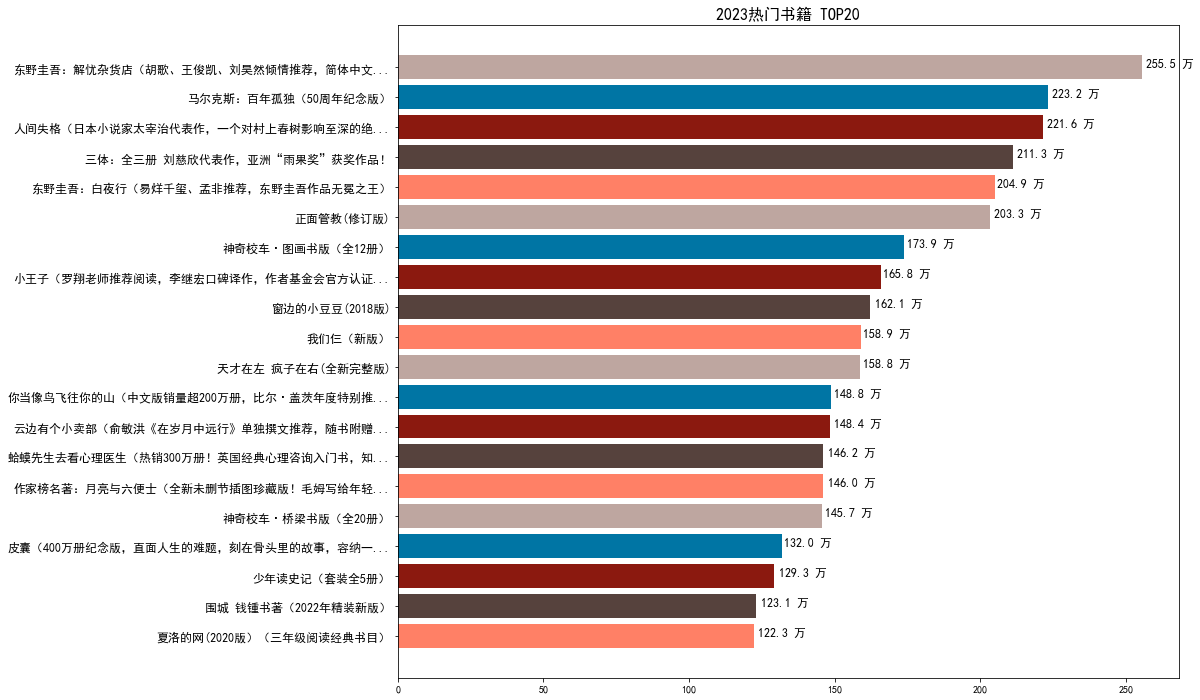

In [36]:
# 画图
import matplotlib.pyplot as plt

# 以下2句显示中文时才需要
plt.rcParams['font.sans-serif'] = 'SimHei'    #默认字体，黑体 
plt.rcParams['axes.unicode_minus'] = False    #正负号正常显示
# 指定画布
plt.figure(figsize=(14, 12))              #默认单位为英寸

# colors= ['r','g','b','orange','purple']
 #配色网：https://mycolor.space/
colors=['#FF8066', '#56423D', '#8B190F', '#0075A4', '#BEA6A0']

# 数据
name = 



# 绘图



#增加数据标签



# 展示图片
plt.show()

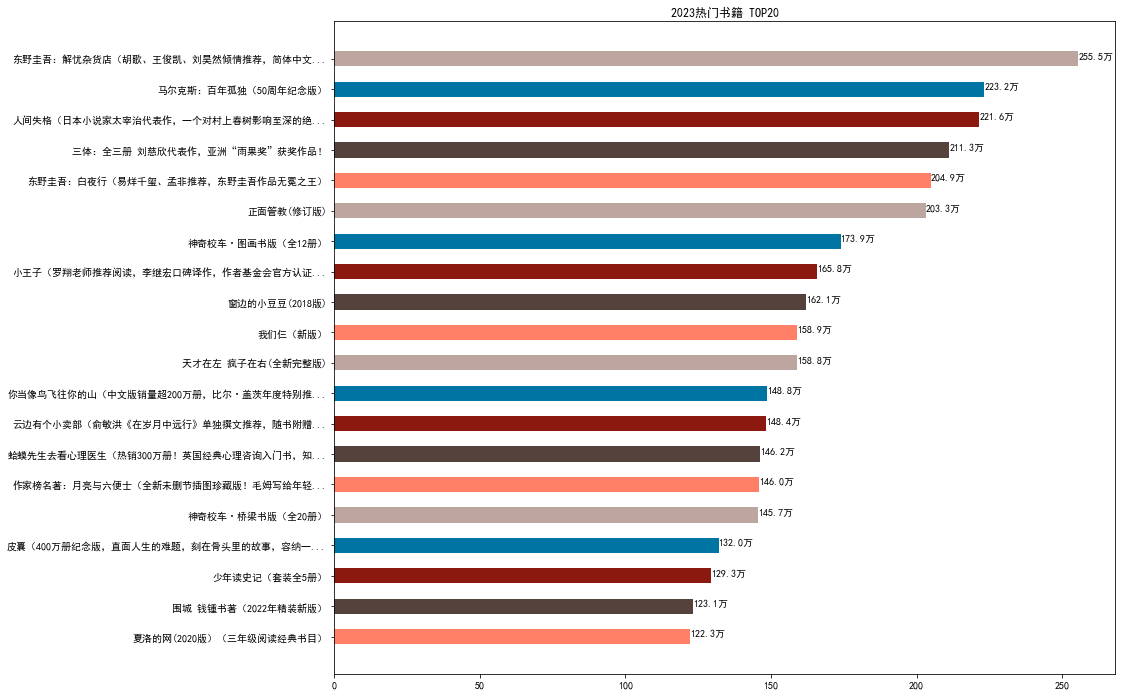

In [16]:
# 画图
import matplotlib.pyplot as plt

# 以下2句显示中文时才需要
plt.rcParams['font.sans-serif'] = 'SimHei'    #默认字体，黑体 
plt.rcParams['axes.unicode_minus'] = False    #正负号正常显示
# 指定画布
plt.figure(figsize=(14, 12))              #默认单位为英寸

# colors= ['r','g','b','orange','purple']
 #配色网：https://mycolor.space/
colors=['#FF8066', '#56423D', '#8B190F', '#0075A4', '#BEA6A0']

# 数据
name = list(df2[-20:].书名)
pls = list(df2[-20:].评论数)
pls = [i/10000 for i in pls]
# 绘图
plt.barh(name, pls, height=0.5,color=colors)


#增加数据标签
for index, y_value in enumerate(pls):
    plt.text(y_value, index, "{:.1f}万".format(y_value))
plt.title('2023热门书籍 TOP20', fontdict=None, loc="center", pad=None)

# 展示图片
plt.show()

In [17]:
name = list(df2[-20:].书名)

In [18]:
name

['夏洛的网(2020版）（三年级阅读经典书目）',
 '围城 钱锺书著（2022年精装新版）',
 '少年读史记（套装全5册）',
 '皮囊（400万册纪念版，直面人生的难题，刻在骨头里的故事，容纳一...',
 '神奇校车·桥梁书版（全20册）',
 '作家榜名著：月亮与六便士（全新未删节插图珍藏版！毛姆写给年轻...',
 '蛤蟆先生去看心理医生（热销300万册！英国经典心理咨询入门书，知...',
 '云边有个小卖部（俞敏洪《在岁月中远行》单独撰文推荐，随书附赠...',
 '你当像鸟飞往你的山（中文版销量超200万册，比尔·盖茨年度特别推...',
 '天才在左 疯子在右(全新完整版)',
 '我们仨（新版）',
 '窗边的小豆豆(2018版)',
 '小王子（罗翔老师推荐阅读，李继宏口碑译作，作者基金会官方认证...',
 '神奇校车·图画书版（全12册）',
 '正面管教(修订版)',
 '东野圭吾：白夜行（易烊千玺、孟非推荐，东野圭吾作品无冕之王）',
 '三体：全三册 刘慈欣代表作，亚洲“雨果奖”获奖作品！',
 '人间失格（日本小说家太宰治代表作，一个对村上春树影响至深的绝...',
 '马尔克斯：百年孤独（50周年纪念版）',
 '东野圭吾：解忧杂货店（胡歌、王俊凯、刘昊然倾情推荐，简体中文...']

In [8]:
# 2. 统计500本书的出版年份，并制作饼图


array([2022, 2011, 2021, 2020, 2018, 2010, 2017, 2019, 2014, 2013, 2016,
       2015, 2008, 1991, 2023, 2012, 2006, 2009], dtype=int64)

In [19]:
cbrq = list(df1.出版日期)

In [20]:
cbrq = [int(i[:4]) for i in cbrq]
cbrq = list(set(cbrq))
import numpy as np
cbrq = np.array(cbrq)
cbrq

array([2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 1991, 2006, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015])

In [21]:
#得到每个年份出版书籍的本数
def fun3(x):
    s = str(x)
    s = s[:4]
    return int(s)
df1['出版年份'] = df1.出版日期.apply(fun3)
df1.sort_values(by='出版年份' , inplace=True, ascending=True)
t1 = df1.groupby(['出版年份']).agg('count')[['书名']]
t1

,书名
出版年份,
1991,1
2006,2
2008,4
2009,3
2010,4
2011,3
2012,5
2013,8
2014,10


In [22]:
#得到每个年份出版书籍的本数
def fun3(x):
    s = str(x)
    s = s[:4]
    return int(s)
df1['出版年份'] = df1.出版日期.apply(fun3)
df1.sort_values(by='出版年份' , inplace=True, ascending=True)
t1 = df1.groupby(['出版年份']).agg('count')[['书名']]

In [23]:
t1

,书名
出版年份,
1991,1
2006,2
2008,4
2009,3
2010,4
2011,3
2012,5
2013,8
2014,10


In [24]:
df1

,书名,作者,出版日期,出版社,现价,原价,评论数,现价（数值）,推荐指数,出版年份
63,毛泽东选集（全四册，32开）,毛泽东,1991-06-01,人民出版社,¥56.70,¥81.00,264510,56.7,☆☆☆☆,1991
136,万历十五年 一本好书 腾讯视频栏目推荐,黄仁宇,2006-06-01,生活.读书.新知三联书店,¥15.60,¥26.00,855234,15.6,☆☆☆☆☆,2006
164,追风筝的人（李雪琴、高圆圆动情推荐，《纽约时报》畅销书榜上榜...,卡勒德·胡赛尼,2006-05-01,上海人民出版社,¥32.40,¥45.00,1125845,32.4,☆☆☆☆☆,2006
360,沉思录,马可.奥勒留,2008-02-01,中央编译出版社,¥10.00,¥20.00,409843,10.0,☆☆☆☆,2008
60,科幻世界·三体(一),刘慈欣,2008-01-01,重庆出版社,¥14.80,¥23.00,401114,14.8,☆☆☆☆,2008
...,...,...,...,...,...,...,...,...,...,...
290,少年中国地理5：秀丽南方（“这里是中国”系列作者星球研究所重磅...,星球研究所,2023-01-04,湖南科技出版社,¥67.60,¥98.00,34,67.6,☆,2023
294,少年中国地理4：北方大地（“这里是中国”系列作者星球研究所重磅...,星球研究所,2023-01-04,湖南科技出版社,¥67.60,¥98.00,29,67.6,☆,2023
316,历史的棋局 还原真实的历史谋略！解读历史上著名的44场战争真相和...,国家人文历史,2023-01-29,人民日报出版社,¥45.00,¥68.00,655,45.0,☆,2023
387,刘星辰重案笔记（省厅专家破案笔记。15年刑警生涯，16宗亲历重案...,刑警刘星辰,2023-01-31,北京联合出版有限公司,¥35.80,¥52.00,12232,35.8,☆,2023


In [25]:
# 只统计2015及以后的年份
t3 = df1.loc[df1['出版年份']>=2015]
t4 = t3.groupby(['出版年份']).agg('count')[['书名']]
#按年份排序
t4

,书名
出版年份,
2015,19
2016,21
2017,41
2018,70
2019,63
2020,64
2021,68
2022,96
2023,18


In [26]:
t3 = df1.loc[df1['出版年份']>=2015]

In [27]:
t3

,书名,作者,出版日期,出版社,现价,原价,评论数,现价（数值）,推荐指数,出版年份
330,三个火枪手 大仲马经典长篇小说，又名《三剑客》，多次翻拍为电影...,大仲马,2015-06-01,中央编译出版社,¥32.00,¥38.00,28738,32.0,☆,2015
176,娱乐至死：媒介文化研究大师尼尔·波兹曼经典畅销作品,波兹曼,2015-05-01,中信出版社,¥28.50,¥38.00,225866,28.5,☆☆☆☆,2015
227,青铜葵花（当当网定制版）,曹文轩,2015-03-01,天天出版社有限责任公司,¥12.50,¥25.00,310311,12.5,☆☆☆☆,2015
414,凯迪克银奖绘本：穿靴子的猫：一年级推荐课外阅读书（麦克米伦世...,弗雷德,2015-02-01,二十一世纪出版社,¥21.00,¥42.00,143568,21.0,☆☆☆,2015
412,乡土中国（精装定制版）,费孝通,2015-05-01,人民出版社,¥11.60,¥21.00,309011,11.6,☆☆☆☆,2015
...,...,...,...,...,...,...,...,...,...,...
290,少年中国地理5：秀丽南方（“这里是中国”系列作者星球研究所重磅...,星球研究所,2023-01-04,湖南科技出版社,¥67.60,¥98.00,34,67.6,☆,2023
294,少年中国地理4：北方大地（“这里是中国”系列作者星球研究所重磅...,星球研究所,2023-01-04,湖南科技出版社,¥67.60,¥98.00,29,67.6,☆,2023
316,历史的棋局 还原真实的历史谋略！解读历史上著名的44场战争真相和...,国家人文历史,2023-01-29,人民日报出版社,¥45.00,¥68.00,655,45.0,☆,2023
387,刘星辰重案笔记（省厅专家破案笔记。15年刑警生涯，16宗亲历重案...,刑警刘星辰,2023-01-31,北京联合出版有限公司,¥35.80,¥52.00,12232,35.8,☆,2023


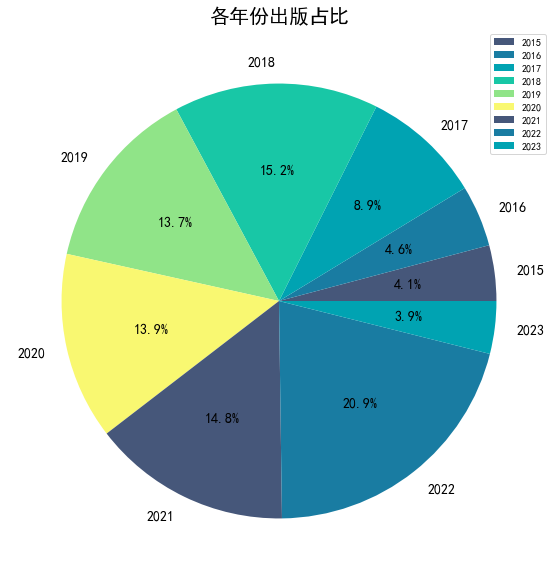

In [13]:
#开始画图
import matplotlib.pyplot as plt

# 以下2句显示中文时才需要
plt.rcParams['font.sans-serif'] = 'SimHei'    #默认字体，黑体 
plt.rcParams['axes.unicode_minus'] = False    #正负号正常显示
# 指定画布
plt.figure(figsize=(10, 10))              #默认单位为英寸

# colors= ['r','g','b','orange','purple']
 #配色网：https://mycolor.space/
colors=['#46577A', '#197CA2', '#00A3B2', '#18C7A6', '#90E488', '#F9F871']

# 数据
sl = list(t4.书名)



# 展示图片
plt.show()

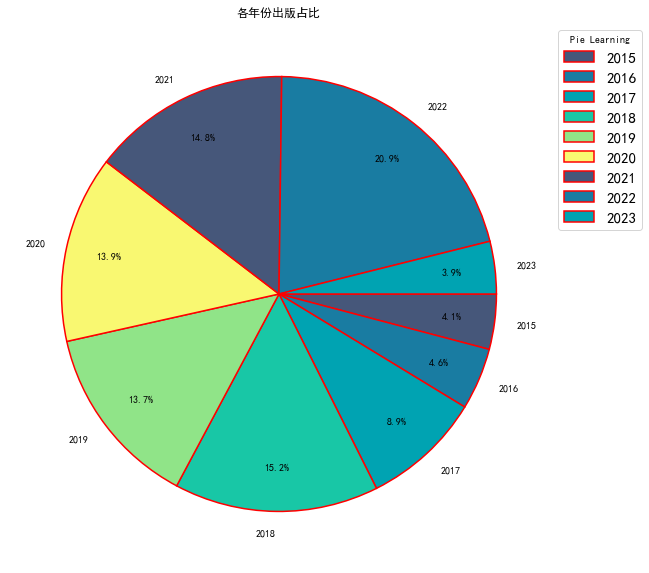

In [40]:
#开始画图
import matplotlib.pyplot as plt

# 以下2句显示中文时才需要
plt.rcParams['font.sans-serif'] = 'SimHei'    #默认字体，黑体 
plt.rcParams['axes.unicode_minus'] = False    #正负号正常显示
# 指定画布
plt.figure(figsize=(10, 10))              #默认单位为英寸

# colors= ['r','g','b','orange','purple']
 #配色网：https://mycolor.space/
colors=['#46577A', '#197CA2', '#00A3B2', '#18C7A6', '#90E488', '#F9F871']

# 数据
sl = list(t4.书名) # 每个年份对应的数量
nf = list(t4.index) # 年份
zl = sum(sl) # 总共数量
zb = [round(i/zl,3) for i in sl] # 对应占比份额

# 绘制饼图
plt.pie(zb, # 绘图数据
        labels=nf, # 添加标签
        colors=colors, # 设置饼图的自定义填充色
        autopct='%.1f%%', # 设置百分比的格式，这里保留一位小数
        pctdistance=0.8,  # 设置百分比标签与圆心的距离
        labeldistance = 1.1, # 设置标签与圆心的距离
        radius = 1, # 设置饼图的半径
        counterclock = False, # 是否逆时针，这里设置为顺时针方向
        wedgeprops = {'linewidth': 1.5, 'edgecolor':'red'},# 设置饼图内外边界的属性值
        textprops = {'fontsize':10, 'color':'black'}, # 设置文本标签的属性值
        )
# 添加图标题
plt.title('各年份出版占比')
#添加图例
plt.legend(nf,
          title="Pie Learning",
          loc="upper left",
          fontsize=15,
          bbox_to_anchor=(1, 0, 0.5, 1))
# 展示图片
plt.show()

In [34]:
sl = list(t4.书名) # 每个年份对应的数量
nf = list(t4.index) # 年份
zl = sum(sl) # 总共数量
zb = [round(i/zl,3) for i in sl]
zb

[0.041, 0.046, 0.089, 0.152, 0.137, 0.139, 0.148, 0.209, 0.039]

In [47]:
# 【练习】 仿照上例,统计各出版社书籍总数,并找出数量最多的前20个
# 画出对应的条形图
t5 = df1.groupby(['出版社']).agg('count')[['书名']]
t5.sort_values(by='书名' , inplace=True, ascending=True)
t5[-20:]

,书名
出版社,
南方出版社,8
二十一世纪出版社,8
人民邮电出版社,8
新星出版社,9
海豚出版社,9
天津人民出版社,9
江苏凤凰文艺出版社,9
湖北教育出版社,10
作家出版社,10


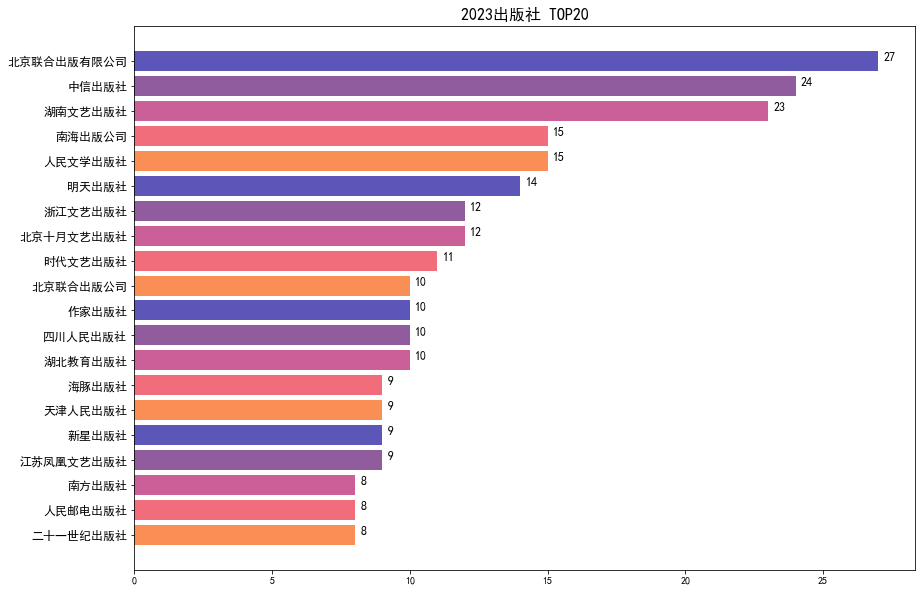

In [53]:
import matplotlib.pyplot as plt

# 以下2句显示中文时才需要
plt.rcParams['font.sans-serif'] = 'SimHei'    #默认字体，黑体 
plt.rcParams['axes.unicode_minus'] = False    #正负号正常显示
# 指定画布
plt.figure(figsize=(14, 10))              #默认单位为英寸

# colors= ['r','g','b','orange','purple']
 #配色网：https://mycolor.space/
colors=['#FA8F55', '#F16D7b', '#CB5F97', '#915C9e', '#5C56b8']

# 数据
y = np.arange(len(pubtop20))  # y轴间距
bar_width=0.5    #条形宽度


#绘图







# 展示图片
plt.show()

In [50]:
import matplotlib.pyplot as plt

# 以下2句显示中文时才需要
plt.rcParams['font.sans-serif'] = 'SimHei'    #默认字体，黑体 
plt.rcParams['axes.unicode_minus'] = False    #正负号正常显示
# 指定画布
plt.figure(figsize=(14, 10))              #默认单位为英寸

# colors= ['r','g','b','orange','purple']
 #配色网：https://mycolor.space/
colors=['#FA8F55', '#F16D7b', '#CB5F97', '#915C9e', '#5C56b8']

# 数据
# y = np.arange(len(pubtop20))  # y轴间距
# bar_width=0.5    #条形宽度


#绘图

# 数据
sl = list(t5[-20:].书名) # 出版社ming
pls = list(t5[-20:].index)
pls = [i/10000 for i in name]
# 绘图
plt.barh(name, pls, height=0.5,color=colors)


#增加数据标签
for index, y_value in enumerate(pls):
    plt.text(y_value, index, "{:.1f}万".format(y_value))
plt.title('2023出版社 TOP20', fontdict=None, loc="center", pad=None)

# 展示图片
plt.show()

TypeError: unsupported operand type(s) for /: 'str' and 'int'

<Figure size 1008x720 with 0 Axes>

In [ ]:
# 数据
name = list(df2[-20:].书名)
pls = list(df2[-20:].评论数)
pls = [i/10000 for i in pls]
# 绘图
plt.barh(name, pls, height=0.5,color=colors)


#增加数据标签
for index, y_value in enumerate(pls):
    plt.text(y_value, index, "{:.1f}万".format(y_value))
plt.title('2023热门书籍 TOP20', fontdict=None, loc="center", pad=None)